In [11]:
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
df_cop = pd.read_csv("../datasets/LST_Copernicus.csv")
df_mod = pd.read_csv("../datasets/LST_MODIS.csv")
df_meteo = pd.read_csv("../datasets/meteostat_tempratures.csv")


In [13]:
df_cop.set_index('time', inplace=True)
df_mod.set_index('time', inplace=True)
df_meteo.set_index('time', inplace=True)

<Axes: xlabel='time'>

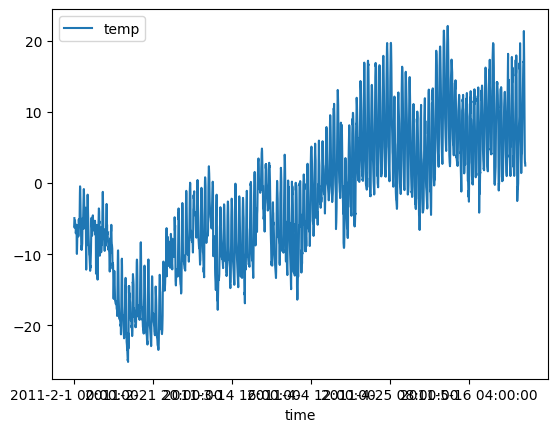

In [14]:
df_cop.plot()

<Axes: xlabel='time'>

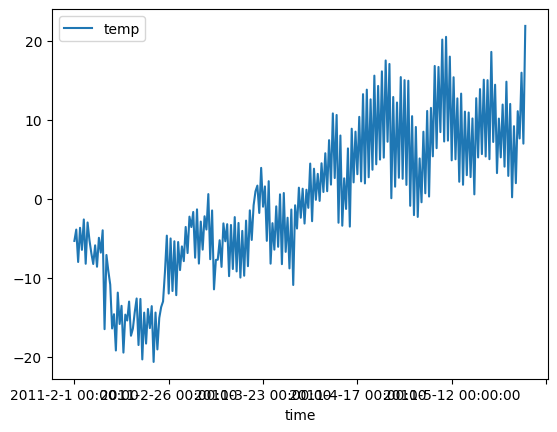

In [15]:
df_mod.plot()

<Axes: xlabel='time'>

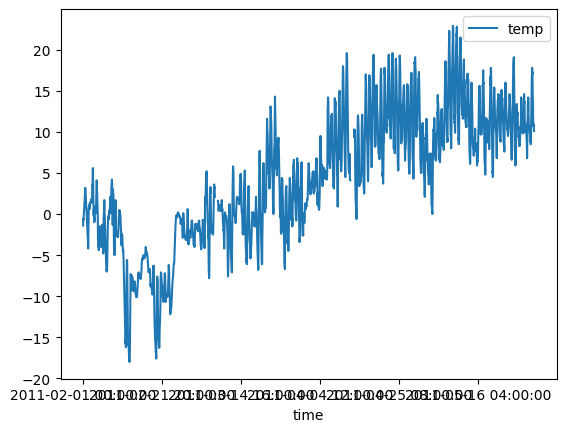

In [16]:
df_meteo.plot()

In [17]:
df_meteo.head()

,temp
time,
2011-02-01 00:00:00,-1.4
2011-02-01 01:00:00,-0.6
2011-02-01 02:00:00,-0.7
2011-02-01 03:00:00,-0.6
2011-02-01 04:00:00,0.0


In [18]:
df_cop.head()

,temp
time,
2011-2-1 00:00:00,-4.921973
2011-2-1 01:00:00,-6.254889
2011-2-1 02:00:00,-6.072241
2011-2-1 03:00:00,-5.648779
2011-2-1 04:00:00,-5.243689


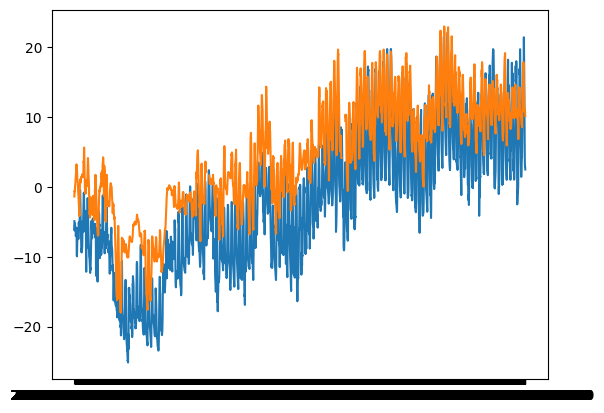

In [19]:
plt.plot(df_cop.index,df_cop['temp'], label='copernicus')
plt.plot(df_cop.index,df_meteo['temp'], label='meteostat')
plt.legend()
plt.show()